In [1]:
import pandas as pd


file_path = "Life Expectancy Data.csv"
df = pd.read_csv(file_path)


df.info(), df.head()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2938 entries, 0 to 2937
Data columns (total 22 columns):
 #   Column                           Non-Null Count  Dtype  
---  ------                           --------------  -----  
 0   Country                          2938 non-null   object 
 1   Year                             2938 non-null   int64  
 2   Status                           2938 non-null   object 
 3   Life expectancy                  2928 non-null   float64
 4   Adult Mortality                  2928 non-null   float64
 5   infant deaths                    2938 non-null   int64  
 6   Alcohol                          2744 non-null   float64
 7   percentage expenditure           2938 non-null   float64
 8   Hepatitis B                      2385 non-null   float64
 9   Measles                          2938 non-null   int64  
 10   BMI                             2904 non-null   float64
 11  under-five deaths                2938 non-null   int64  
 12  Polio               

(None,
        Country  Year      Status  Life expectancy   Adult Mortality  \
 0  Afghanistan  2015  Developing              65.0            263.0   
 1  Afghanistan  2014  Developing              59.9            271.0   
 2  Afghanistan  2013  Developing              59.9            268.0   
 3  Afghanistan  2012  Developing              59.5            272.0   
 4  Afghanistan  2011  Developing              59.2            275.0   
 
    infant deaths  Alcohol  percentage expenditure  Hepatitis B  Measles   ...  \
 0             62     0.01               71.279624         65.0      1154  ...   
 1             64     0.01               73.523582         62.0       492  ...   
 2             66     0.01               73.219243         64.0       430  ...   
 3             69     0.01               78.184215         67.0      2787  ...   
 4             71     0.01                7.097109         68.0      3013  ...   
 
    Polio  Total expenditure  Diphtheria    HIV/AIDS         GDP 

In [2]:
# Clean column names by stripping extra spaces
df.columns = df.columns.str.strip()

# Check missing values
missing_values = df.isnull().sum()

# Display columns with missing values
missing_values[missing_values > 0]


Life expectancy                     10
Adult Mortality                     10
Alcohol                            194
Hepatitis B                        553
BMI                                 34
Polio                               19
Total expenditure                  226
Diphtheria                          19
GDP                                448
Population                         652
thinness  1-19 years                34
thinness 5-9 years                  34
Income composition of resources    167
Schooling                          163
dtype: int64

In [3]:
from sklearn.impute import SimpleImputer

# Impute numerical columns with median values
num_cols = df.select_dtypes(include=['float64', 'int64']).columns
imputer = SimpleImputer(strategy='median')
df[num_cols] = imputer.fit_transform(df[num_cols])

# Convert categorical column 'Status' into numerical format (0 for Developing, 1 for Developed)
df['Status'] = df['Status'].map({'Developing': 0, 'Developed': 1})

# Verify missing values are handled
df.isnull().sum().sum()  # Should be 0 if all missing values are filled


0

In [4]:
from sklearn.model_selection import train_test_split

# Select relevant features for prediction
features = [
    "Adult Mortality", "Alcohol", "Hepatitis B", "BMI", "Polio", "Total expenditure",
    "Diphtheria", "GDP", "Population", "thinness  1-19 years", "thinness 5-9 years",
    "Income composition of resources", "Schooling", "Status"
]

X = df[features]  # Feature variables
y = df["Life expectancy"]  # Target variable

# Split the data: 70% training, 15% validation, 15% testing
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Verify split sizes
X_train.shape, X_val.shape, X_test.shape


((2056, 14), (441, 14), (441, 14))

In [5]:
from sklearn.linear_model import LinearRegression

# Initialize and train the Linear Regression model
model = LinearRegression()
model.fit(X_train, y_train)

# Evaluate on the validation set
y_val_pred = model.predict(X_val)

# Compute model performance metrics
from sklearn.metrics import mean_squared_error, r2_score

mse = mean_squared_error(y_val, y_val_pred)
rmse = mse ** 0.5  # Root Mean Squared Error
r2 = r2_score(y_val, y_val_pred)

mse, rmse, r2


(19.430130421821673, 4.4079621620224545, 0.7998985562235049)

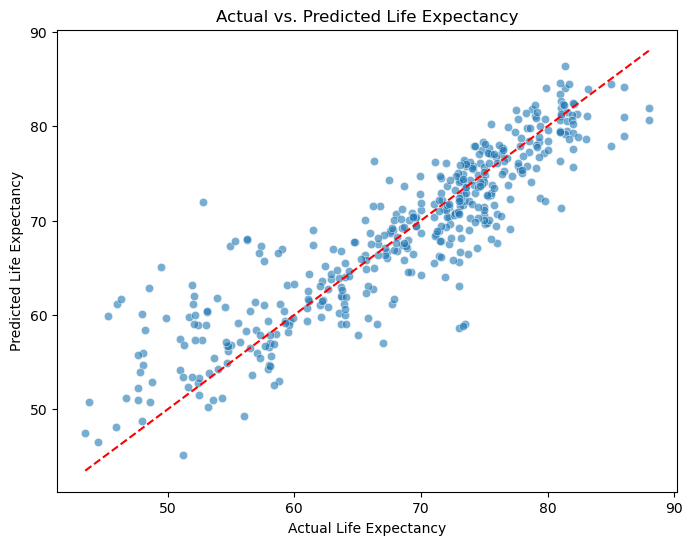

In [7]:
# Scattering
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_val, y=y_val_pred, alpha=0.6)
plt.plot([y_val.min(), y_val.max()], [y_val.min(), y_val.max()], color='red', linestyle='--')  # Regression line
plt.xlabel("Actual Life Expectancy")
plt.ylabel("Predicted Life Expectancy")
plt.title("Actual vs. Predicted Life Expectancy")
plt.show()


In [8]:
# Predict on the test set
y_test_pred = model.predict(X_test)

# Compute test set performance metrics
mse_test = mean_squared_error(y_test, y_test_pred)
rmse_test = mse_test ** 0.5
r2_test = r2_score(y_test, y_test_pred)

mse_test, rmse_test, r2_test


(22.047956587415296, 4.695525166306246, 0.7539530688739606)